# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = city_url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        response = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bata
Processing Record 2 of Set 1 | ulubey
Processing Record 3 of Set 1 | alice springs
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | green river
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | moses lake
Processing Record 11 of Set 1 | as suwayq
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | wewak
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | formosa do rio preto
Processing Record 21 of Set 1 | fort bragg
Processing Record 22 of Set 1 | carnarvon
Processing R

Processing Record 40 of Set 4 | tarawa
Processing Record 41 of Set 4 | ahau
City not found. Skipping...
Processing Record 42 of Set 4 | kalkaman
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | nova vicosa
Processing Record 45 of Set 4 | niafunke
Processing Record 46 of Set 4 | rio brilhante
Processing Record 47 of Set 4 | twin falls
Processing Record 48 of Set 4 | nyrob
Processing Record 49 of Set 4 | santiago de cao
Processing Record 0 of Set 5 | pontalina
Processing Record 1 of Set 5 | pindushi
Processing Record 2 of Set 5 | cable beach
City not found. Skipping...
Processing Record 3 of Set 5 | talakan
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | marvdasht
City not found. Skipping...
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | saipan
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | cabedelo
Processing Record 10 of Set 5 | siguiri
Processing Record 11 of Set 5 | kievka
Processing Rec

Processing Record 34 of Set 8 | markaz-e hukumat-e darweshan
Processing Record 35 of Set 8 | tobruk
Processing Record 36 of Set 8 | verkh-tula
Processing Record 37 of Set 8 | el jadid
Processing Record 38 of Set 8 | sierra grande
Processing Record 39 of Set 8 | port lincoln
Processing Record 40 of Set 8 | arcelia
Processing Record 41 of Set 8 | skutskar
City not found. Skipping...
Processing Record 42 of Set 8 | quarai
Processing Record 43 of Set 8 | bandipura
Processing Record 44 of Set 8 | puerto cabezas
Processing Record 45 of Set 8 | oneonta
Processing Record 46 of Set 8 | walvis bay
Processing Record 47 of Set 8 | huarmey
Processing Record 48 of Set 8 | saranac lake
Processing Record 49 of Set 8 | spring creek
Processing Record 0 of Set 9 | nar'yan-mar
Processing Record 1 of Set 9 | cabinda
Processing Record 2 of Set 9 | batang
Processing Record 3 of Set 9 | muang phonsavan
Processing Record 4 of Set 9 | brookings
Processing Record 5 of Set 9 | bargara
City not found. Skipping...


Processing Record 23 of Set 12 | midvagur
Processing Record 24 of Set 12 | rice lake
Processing Record 25 of Set 12 | aniva
Processing Record 26 of Set 12 | turpan
Processing Record 27 of Set 12 | bengkulu
Processing Record 28 of Set 12 | paragominas
Processing Record 29 of Set 12 | afaahiti
Processing Record 30 of Set 12 | trincomalee
Processing Record 31 of Set 12 | nizhnevartovsk
Processing Record 32 of Set 12 | burang
Processing Record 33 of Set 12 | san rafael
Processing Record 34 of Set 12 | kuta
Processing Record 35 of Set 12 | kyzyl
Processing Record 36 of Set 12 | vredendal
Processing Record 37 of Set 12 | palafrugell
Processing Record 38 of Set 12 | butare
Processing Record 39 of Set 12 | lakatoro
Processing Record 40 of Set 12 | carnot-moon
Processing Record 41 of Set 12 | kunigal
Processing Record 42 of Set 12 | mar del plata
Processing Record 43 of Set 12 | marina di massa
Processing Record 44 of Set 12 | arteche
Processing Record 45 of Set 12 | mermoz boabab
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bata,1.8639,9.7658,299.83,86,84,2.66,GQ,1706499433
1,ulubey,40.8721,37.7588,274.22,97,100,1.33,TR,1706499725
2,alice springs,-23.7000,133.8833,313.83,11,23,4.12,AU,1706499725
3,ilulissat,69.2167,-51.1000,250.16,49,75,5.14,GL,1706499626
4,lihue,21.9789,-159.3672,300.02,77,40,8.75,US,1706499726


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bata,1.8639,9.7658,299.83,86,84,2.66,GQ,1706499433
1,ulubey,40.8721,37.7588,274.22,97,100,1.33,TR,1706499725
2,alice springs,-23.7000,133.8833,313.83,11,23,4.12,AU,1706499725
3,ilulissat,69.2167,-51.1000,250.16,49,75,5.14,GL,1706499626
4,lihue,21.9789,-159.3672,300.02,77,40,8.75,US,1706499726


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

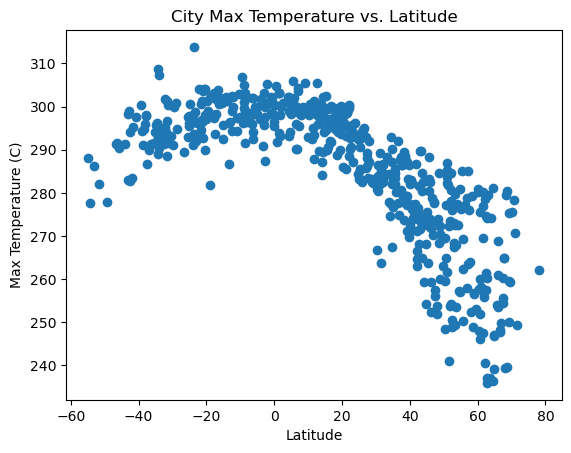

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

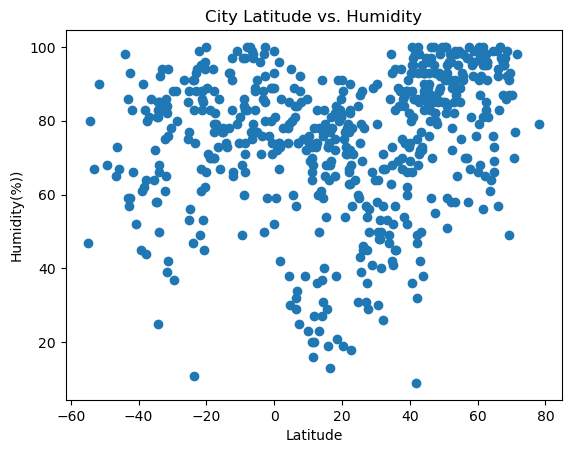

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%))")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

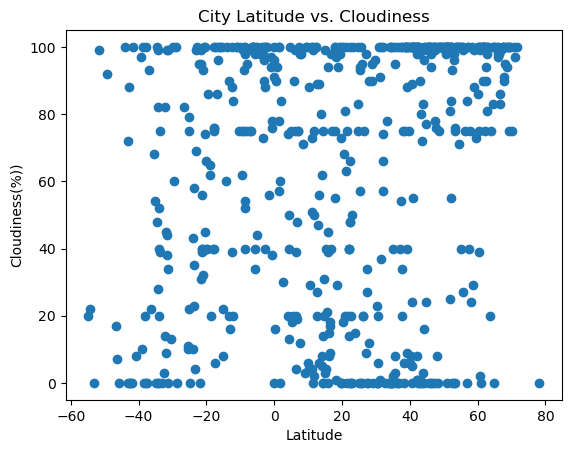

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%))")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

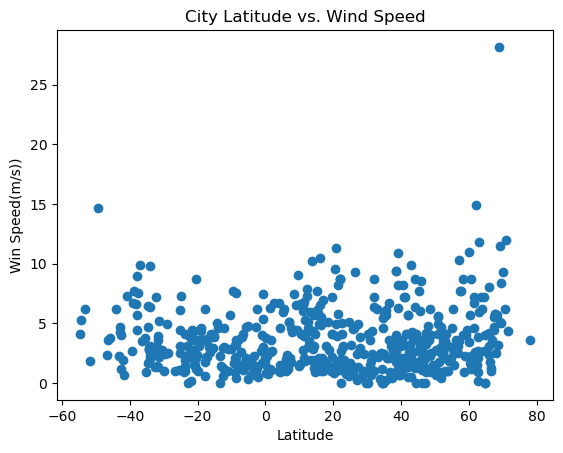

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Win Speed(m/s))")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
     #linear regression using linregress
        #slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

        # Calculate the predicted y values
            #y= slope * x_values + intercept

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df = city_data_df.loc[(city_data_df["Lat"]) > 0, :]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bata,1.8639,9.7658,299.83,86,84,2.66,GQ,1706499433
1,ulubey,40.8721,37.7588,274.22,97,100,1.33,TR,1706499725
3,ilulissat,69.2167,-51.1000,250.16,49,75,5.14,GL,1706499626
4,lihue,21.9789,-159.3672,300.02,77,40,8.75,US,1706499726
6,green river,41.5286,-109.4662,277.37,98,100,1.40,US,1706499726


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[(city_data_df["Lat"]) < 0, :]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,alice springs,-23.7000,133.8833,313.83,11,23,4.12,AU,1706499725
5,alofi,-19.0595,-169.9187,302.09,70,65,4.63,NU,1706499726
7,ushuaia,-54.8000,-68.3000,287.96,47,20,4.12,AR,1706499205
8,adamstown,-25.0660,-130.1015,297.87,77,79,4.41,PN,1706499726
11,avarua,-21.2078,-159.7750,301.18,83,40,3.60,CK,1706499230


###  Temperature vs. Latitude Linear Regression Plot

The R-squared is: 0.7000785570132051


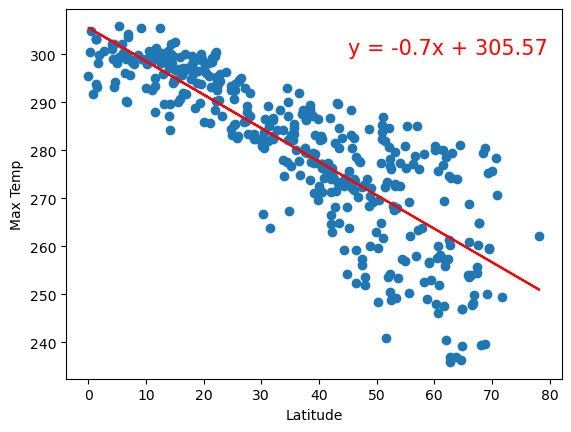

In [61]:
# Linear regression on Northern Hemisphere
x_val = north_df["Lat"]
y_val = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (45, 300), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

The R-squared is: 0.264644798232842


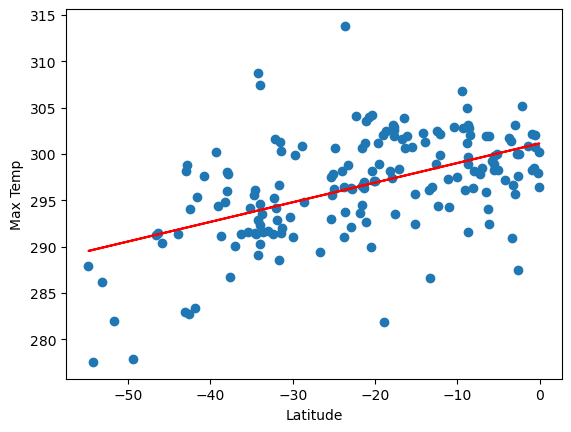

In [62]:
# Linear regression on Southern Hemisphere
x_val = south_df["Lat"]
y_val = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq, (45, 300), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** Based on the r-squared of the northern hemisphere, it shows that the model fits well due to the higher r-squared value. However, it doesnt seem like that is the case for the souther hemisphere r-square which shows a 0.26 on the value, meaning the model doesnt quite fit. Furthermore, a negative relationship between temperature and latitude in the norther hemisphere is shown. This means that as you move away from the equator the maximum temperatures tend to decrease. For the souther hemisphere it shows a weak positive relationship. It can suggest that there is a slight temperature increase as you move away form the poles. 

### Humidity vs. Latitude Linear Regression Plot

The R-squared is: 0.19357284490648066


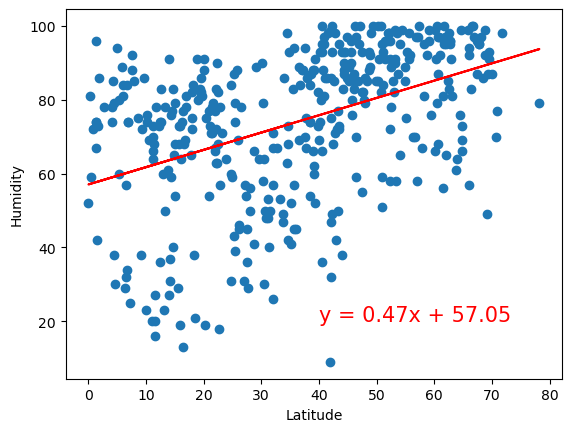

In [67]:
# Northern Hemisphere
x_val = north_df["Lat"]
y_val = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (40, 20), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

The R-squared is: 0.08768834501563243


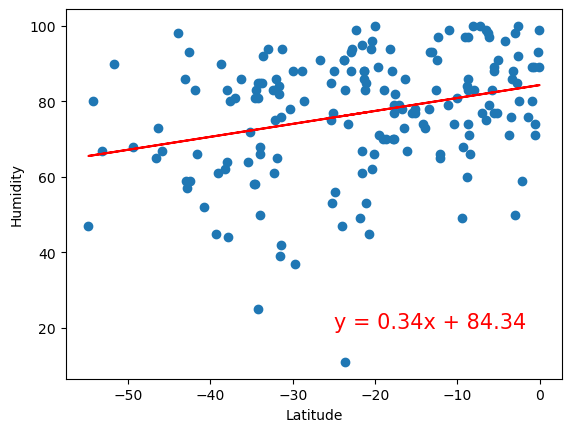

In [68]:
# Southern Hemisphere
x_val = south_df["Lat"]
y_val = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-25, 20), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** Based on both north and south hemisphere the linear model doesnt quite fit due to the low r-squared value. A slightly positive relationship between the latitude and humidity for both as well. However, for north it shows that there is a tendency for humidity to increase as you move away from the equator toward higher latitudes. For south, it shoes that there is tendency for humidity to increase as you get closer to the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared is: 0.09245802939377126


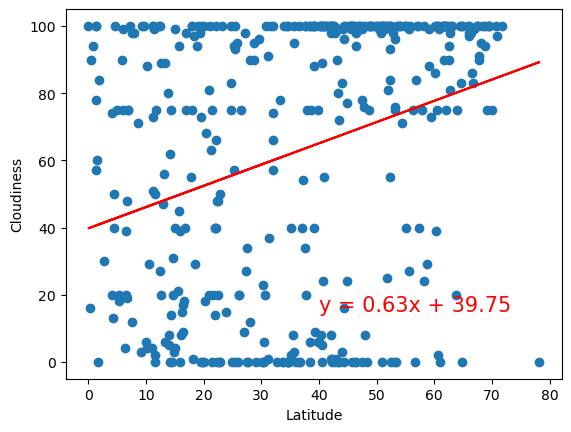

In [69]:
# Northern Hemisphere
x_val = north_df["Lat"]
y_val = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (40, 15), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

The R-squared is: 0.17623789705074439


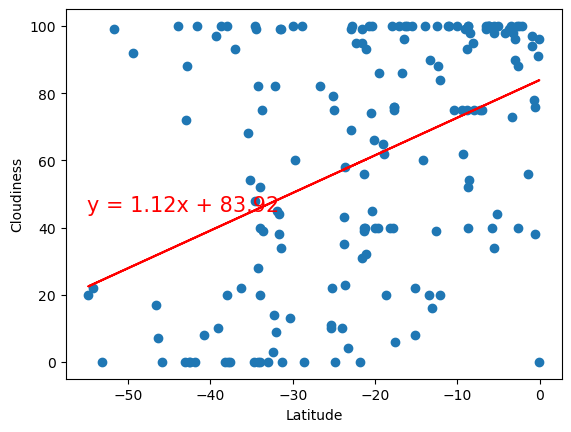

In [73]:
# Southern Hemisphere
x_val = south_df["Lat"]
y_val = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-55, 45), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** The r-square for both the north and south hemisphere as low, showing a weak fit to the linear model. There is no coorelation between latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared is: 0.008783352655336984


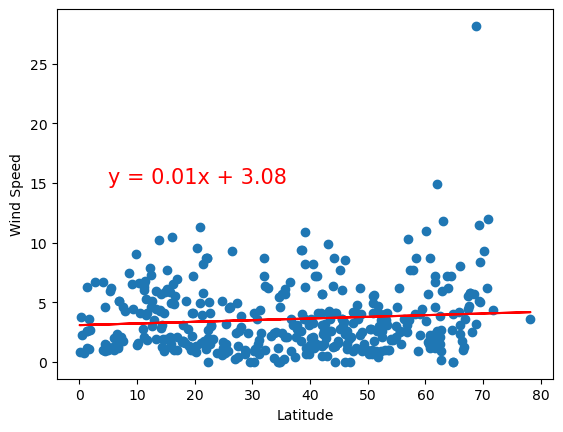

In [75]:
# Northern Hemisphere
x_val = north_df["Lat"]
y_val = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (5, 15), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

The R-squared is: 0.09538083648805375


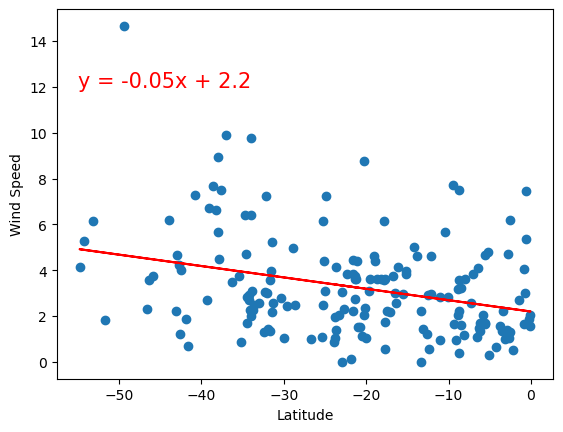

In [77]:
# Southern Hemisphere
x_val = south_df["Lat"]
y_val = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = rvalue**2

plt.scatter(x_val, y_val)
plt.plot(x_val, regression, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-55, 12), fontsize=15, color="red")
print(f"The R-squared is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** Both r-square show extremely low values indicating that the fit to the linear model is very weak. No coorelation to be seen. 